# SALARY PREDICTION

Problem: 
- Given a dataset which captures gross salary from 2013 to 2014 and includes only those employees who were employed on june 2013. 
- Predict the salary for employees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\Python Projects\\Salary Prediction\\trainfile.csv")

In [3]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [5]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [6]:
df.describe().T

,count,unique,top,freq
Name,18981,18788,"Battle,Daron J",2
JobTitle,18981,1075,AIDE BLUE CHIP,4817
AgencyID,18981,1177,P04001,316
Agency,18981,65,Youth Summer,4323
HireDate,18911,4737,05/21/2014,1478
AnnualSalary,18981,1590,$11310.00,4811
GrossPay,15758,13732,$1051.25,848


# Data Cleaning and Preparation

In [7]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [8]:
salary_cpy = df.copy()

In [9]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [10]:
salary_cpy.columns = salary_cpy.columns.str.strip()

In [11]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [12]:
# Dropping null values from 'HireDate' column and
# Dropping 'GrossPay' column
salary_cpy = salary_cpy.dropna(subset=['HireDate'])
salary_cpy = salary_cpy.drop('GrossPay', axis=1)

In [13]:
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [14]:
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [15]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [16]:
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x: float(str(x)[1:]))

In [17]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [18]:
salary_cpy['month'] = salary_cpy['HireDate'].apply(lambda x: int(str(x[0:2])))
salary_cpy['day'] = salary_cpy['HireDate'].apply(lambda x: int(str(x[3:5])))
salary_cpy['year'] = salary_cpy['HireDate'].apply(lambda x: int(str(x[6:])))

In [19]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013


In [20]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [21]:
len(salary_cpy.JobTitle.value_counts())

1073

In [22]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [23]:
len(salary_cpy.AgencyID.value_counts())

1177

In [24]:
salary_cpy['Agency'].value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [25]:
len(salary_cpy['Agency'].value_counts())

65

In [26]:
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

In [27]:
len(salary_cpy.HireDate.value_counts())

4737

In [28]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
58227.0       1
41704.0       1
44700.0       1
43000.0       1
900.0         1
Name: AnnualSalary, Length: 1590, dtype: int64

## Exploratory Data Analysis

In [29]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'month', 'day', 'year'],
      dtype='object')

<AxesSubplot:xlabel='AnnualSalary'>

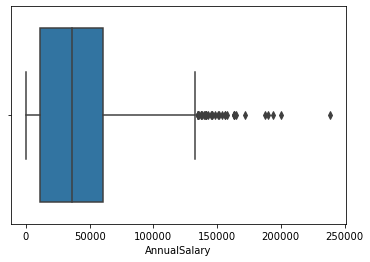

In [30]:
# Plotting the AnnualSalary with SEABORN
sns.boxplot(data=salary_cpy, x='AnnualSalary')

<AxesSubplot:>

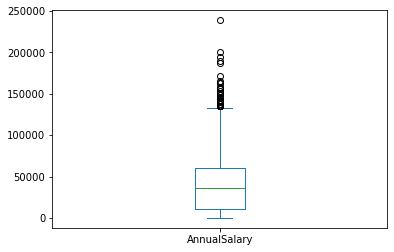

In [31]:
# Plotting the AnnualSalary
salary_cpy.AnnualSalary.plot.box()

In [32]:
# We can call "describe()" method for a particular column/frature
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [33]:
salary_cpy[salary_cpy['AnnualSalary'] > 140000]

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
846,"Barbour,Jacqueline M",CONTRACT SERVICES SPEC. I,A99386,Police Department,07/03/2007,156000.0,7,3,2007
991,"Batts,Anthony W",EXECUTIVE LEVEL III,A99390,Police Department,09/25/2012,193800.0,9,25,2012
1229,"Bernstein,Gregg L",STATE'S ATTORNEY,A29001,States Attorneys Office,01/03/2011,238772.0,1,3,2011
1350,"Black,Harry E",EXECUTIVE LEVEL III,A23001,FIN-Admin & Budgets,01/30/2012,190000.0,1,30,2012
2719,"Calhoun,N. Anthony",EXECUTIVE LEVEL II,A54001,FPR Admin,07/08/2013,145000.0,7,8,2013
3177,"Charles,Ronnie E",EXECUTIVE LEVEL III,A83001,HR-Human Resources,07/05/2012,200000.0,7,5,2012
3277,"Chow,Rudolph S",DIRECTOR PUBLIC WORKS,A41101,DPW-Administration,02/01/2011,163200.0,2,1,2011
5341,"Fannon,Mary P",CONTRACT SERV SPEC II,A01001,Mayors Office,01/02/2007,145600.0,1,2,2007
5698,"Ford,Niles R",EXECUTIVE LEVEL III,A64006,Fire Department,01/15/2014,165000.0,1,15,2014
6660,"Graziano,Paul T",EXECUTIVE LEVEL III,A06001,Housing & Community Dev,11/01/2000,146000.0,11,1,2000


In [34]:
len(salary_cpy[salary_cpy['AnnualSalary'] > 140000])

25

In [35]:
salary_cpy['AnnualSalary'].max()

238772.0

In [36]:
# Removing the rows having salary > 140000 or remoing the OUTLIARS
salary_cpy = salary_cpy[salary_cpy['AnnualSalary'] < 140000]

In [37]:
salary_cpy['AnnualSalary'].max()

137904.0

<AxesSubplot:>

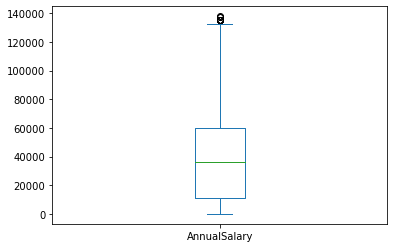

In [38]:
salary_cpy.AnnualSalary.plot.box()

Text(0.5, 1.0, 'Annual Salary Distribution')

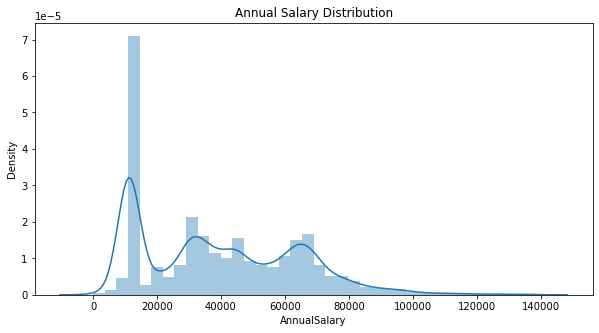

In [39]:
# Check the distribution of the annual salary
plt.figure(figsize=(10,5))
sns.distplot(salary_cpy.AnnualSalary)
plt.title('Annual Salary Distribution')

In [40]:
salary_cpy.groupby('JobTitle').count()

,Name,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
JobTitle,,,,,,,,
911 LEAD OPERATOR,5,5,5,5,5,5,5,5
911 OPERATOR,78,78,78,78,78,78,78,78
911 OPERATOR SUPERVISOR,4,4,4,4,4,4,4,4
ACCOUNT EXECUTIVE,5,5,5,5,5,5,5,5
ACCOUNTANT I,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...
ZONING ADMINISTRATOR,1,1,1,1,1,1,1,1
ZONING APPEALS ADVISOR BMZA,1,1,1,1,1,1,1,1
ZONING ENFORCEMENT OFFICER,1,1,1,1,1,1,1,1


In [41]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'month', 'day', 'year'],
      dtype='object')

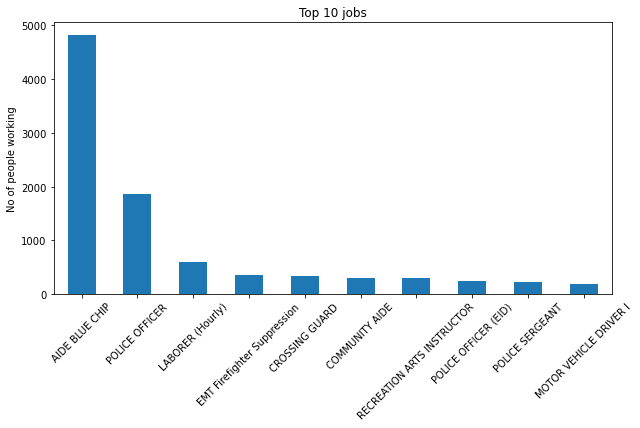

In [42]:
# Top 10 jobs for which hiring is there
plt.figure(figsize=(10,5))
salary_cpy.JobTitle.value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people working')
plt.title('Top 10 jobs')
plt.xticks(rotation=45)
plt.show()

In [43]:
salary_cpy.JobTitle.value_counts().head(10)

AIDE BLUE CHIP                 4817
POLICE OFFICER                 1866
LABORER (Hourly)                597
EMT Firefighter Suppression     358
CROSSING GUARD                  337
COMMUNITY AIDE                  302
RECREATION ARTS INSTRUCTOR      299
POLICE OFFICER (EID)            250
POLICE SERGEANT                 222
MOTOR VEHICLE DRIVER I          189
Name: JobTitle, dtype: int64

Text(0.5, 1.0, "Top AgencyID's with highest number of employees")

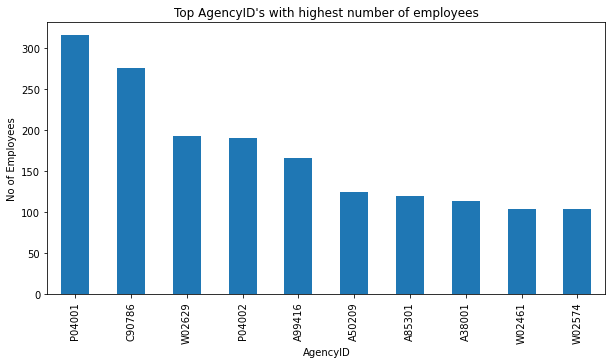

In [44]:
## which agencyid have higher number of people working for.
## pattern between year and salary
plt.figure(figsize=(10,5))
salary_cpy.groupby('AgencyID')['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of Employees')
plt.title("Top AgencyID's with highest number of employees" )

<AxesSubplot:>

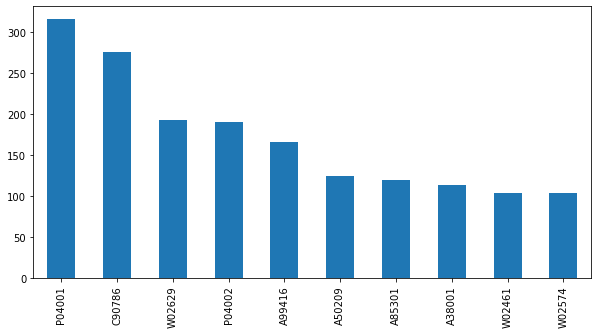

In [45]:
# Method 2- using groupby
plt.figure(figsize=(10,5))
salary_cpy.AgencyID.value_counts().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='year', ylabel='AnnualSalary'>

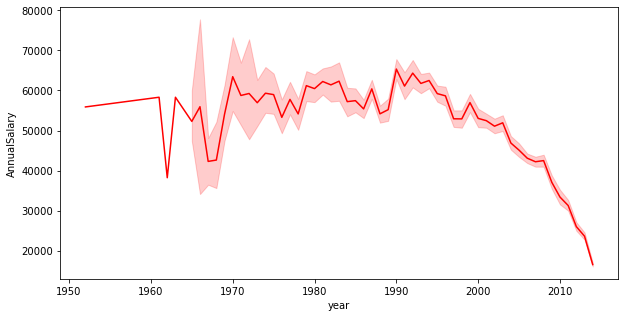

In [46]:
# Year v/s AnnualSalary
plt.figure(figsize=(10,5))
sns.lineplot(x=salary_cpy.year, y=salary_cpy.AnnualSalary, color='r')

Text(0, 0.5, 'Median Salary Per Year')

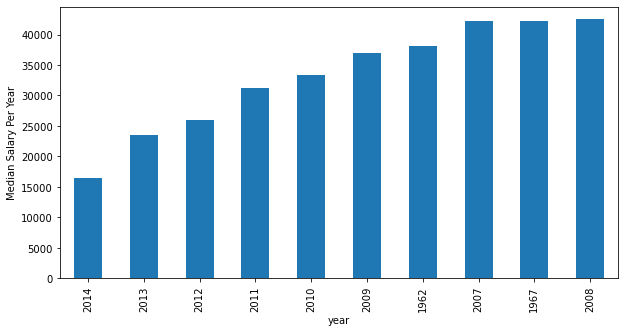

In [47]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['year'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('Median Salary Per Year')

<AxesSubplot:xlabel='month'>

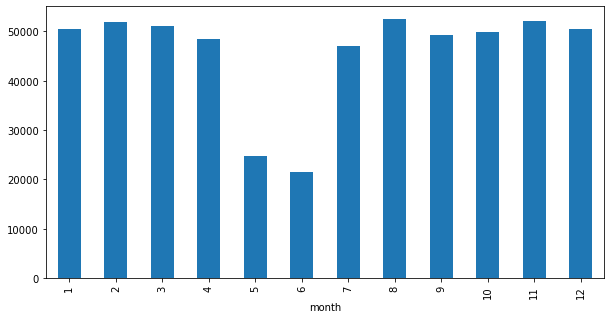

In [48]:
plt.figure(figsize=(10,5))
# if month have any impact on salary?
salary_cpy.groupby('month')['AnnualSalary'].mean().plot.bar()

In [49]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013


<AxesSubplot:xlabel='month'>

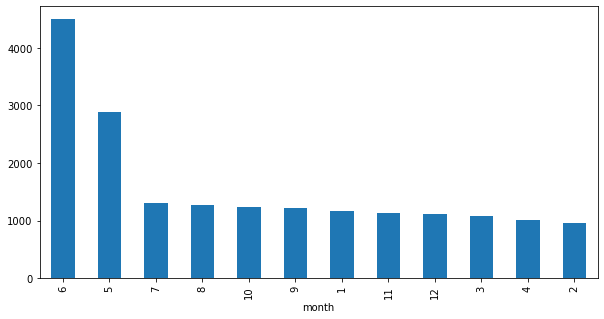

In [50]:
# in which months higher number of people are hired
plt.figure(figsize=(10,5))
salary_cpy.groupby('month')['Name'].count().sort_values(ascending=False).plot.bar()

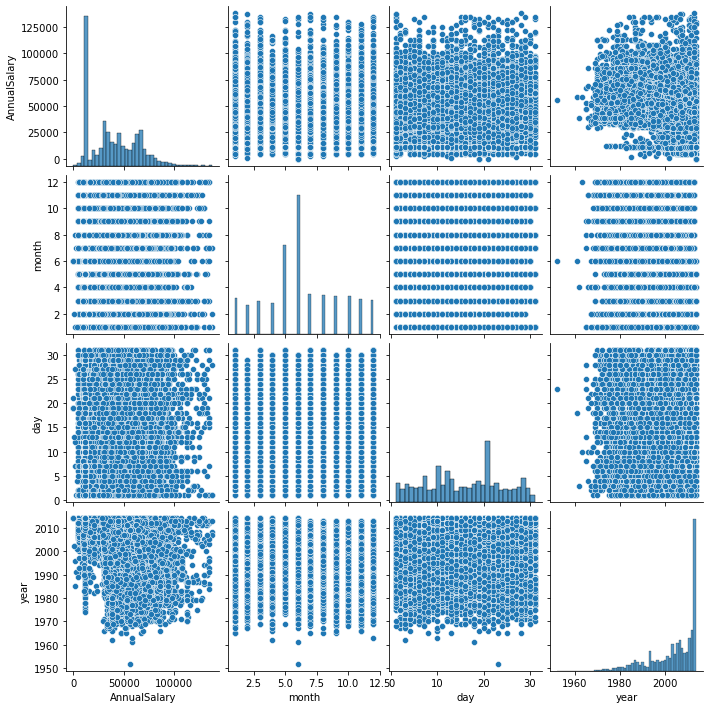

In [51]:
# multivariate analysis
sns.pairplot(salary_cpy)

<AxesSubplot:>

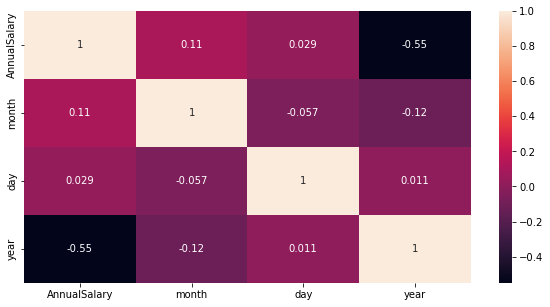

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(), annot=True)

## Feature engineering

In [53]:
# Every job title mean salary
mean_sal = salary_cpy.groupby('JobTitle')['AnnualSalary'].mean()

mean_sal

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1067, dtype: float64

In [54]:
salary_cpy['MeanSalary'] = salary_cpy.JobTitle.map(mean_sal)

In [55]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year,MeanSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013,11313.967200
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979,47443.500000
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006,69750.666667
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009,57940.000000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013,44531.160494


In [56]:
# Average anual salary of each agency
mean_agency_ID = salary_cpy.groupby('AgencyID')['AnnualSalary'].mean()

mean_agency_ID

AgencyID
A01001    58253.577662
A01020    80547.000000
A01030    77855.222222
A02001    66376.466667
A02002    42858.372549
              ...     
W02698    11310.000000
W02699    11310.000000
W07900    24515.227273
W07901    21840.000000
W07905    15080.000000
Name: AnnualSalary, Length: 1176, dtype: float64

In [57]:
salary_cpy['mean_agency_ID'] = salary_cpy.AgencyID.map(mean_agency_ID)

In [58]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year,MeanSalary,mean_agency_ID
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013,11313.967200,11310.000000
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979,47443.500000,46667.000000
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006,69750.666667,65926.133333
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009,57940.000000,48071.851064
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013,44531.160494,44012.307229


In [59]:
# Avearge annual salary of agency
mean_agency = salary_cpy.groupby('Agency')['AnnualSalary'].mean()

mean_agency

Agency
COMP-Audits               65004.615385
COMP-Communication Ser    37876.966667
COMP-Comptroller's O      67637.625000
COMP-Real Estate          64279.875000
Circuit Court             56210.485214
                              ...     
TRANS-Towing              33920.215385
TRANS-Traffic             34172.489691
Youth Summer              11346.315789
Youth Summer              11310.270645
Youth Temp Adult          24202.971014
Name: AnnualSalary, Length: 65, dtype: float64

In [60]:
salary_cpy['mean_agency'] = salary_cpy.Agency.map(mean_agency)

In [61]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year,MeanSalary,mean_agency_ID,mean_agency
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013,11313.967200,11310.000000,11310.270645
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979,47443.500000,46667.000000,51495.424242
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006,69750.666667,65926.133333,64874.560224
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009,57940.000000,48071.851064,39980.900360
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013,44531.160494,44012.307229,61481.005417


In [62]:
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18885 non-null  object 
 1   JobTitle        18885 non-null  object 
 2   AgencyID        18885 non-null  object 
 3   Agency          18885 non-null  object 
 4   HireDate        18885 non-null  object 
 5   AnnualSalary    18885 non-null  float64
 6   month           18885 non-null  int64  
 7   day             18885 non-null  int64  
 8   year            18885 non-null  int64  
 9   MeanSalary      18885 non-null  float64
 10  mean_agency_ID  18885 non-null  float64
 11  mean_agency     18885 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 2.4+ MB


In [63]:
salary_cpy.columns


Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'month', 'day', 'year', 'MeanSalary', 'mean_agency_ID', 'mean_agency'],
      dtype='object')

In [64]:
# Dropping Columns
salary_cpy.drop(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate'], axis=1, inplace=True)

In [65]:
salary_cpy.head()

,AnnualSalary,month,day,year,MeanSalary,mean_agency_ID,mean_agency
0,11310.0,6,10,2013,11313.967200,11310.000000,11310.270645
1,53428.0,10,24,1979,47443.500000,46667.000000,51495.424242
2,68300.0,9,25,2006,69750.666667,65926.133333,64874.560224
3,62000.0,7,23,2009,57940.000000,48071.851064,39980.900360
4,43999.0,7,24,2013,44531.160494,44012.307229,61481.005417


# Train, Test and Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
features = salary_cpy.drop('AnnualSalary', axis=1)
target = salary_cpy['AnnualSalary']

### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
scaled = scaler.fit_transform(features)

# scaler.fit(features)
# scaler.tranform(features)   -> Both are same

In [71]:
scaled

array([[-0.12542039, -0.68780365,  0.85832175, -1.16221248, -1.27057738,
        -1.34557873],
       [ 1.23114554,  0.98183237, -2.41364232,  0.3279095 ,  0.32342633,
         0.57305342],
       [ 0.89200406,  1.10109208,  0.18468209,  1.24794352,  1.19168807,
         1.21183761],
       ...,
       [ 1.90942851,  0.14701436,  0.85832175,  0.20779333,  0.20374451,
         1.04981301],
       [-1.82112781,  0.86257265,  0.85832175,  0.87004538,  0.93368674,
         1.04981301],
       [ 1.23114554, -0.09150507, -2.41364232,  0.57227652,  0.13139762,
         0.14669659]])

In [72]:
# Scaled Features
scaled_features = pd.DataFrame(scaled, columns=salary_cpy.columns[1:])
scaled_features.head()

,month,day,year,MeanSalary,mean_agency_ID,mean_agency
0,-0.125420,-0.687804,0.858322,-1.162212,-1.270577,-1.345579
1,1.231146,0.981832,-2.413642,0.327909,0.323426,0.573053
2,0.892004,1.101092,0.184682,1.247944,1.191688,1.211838
3,0.213721,0.862573,0.473385,0.760826,0.386761,0.023295
4,0.213721,0.981832,0.858322,0.207793,0.203745,1.049813


In [73]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=101)

In [74]:
X_train.head()

,month,day,year,MeanSalary,mean_agency_ID,mean_agency
17088,-0.125420,-0.568544,0.473385,-1.162212,-1.270577,-1.345579
2218,-0.803703,0.504794,-1.643768,1.381150,1.803911,1.498560
11970,-0.464562,0.624053,0.954556,-1.162212,-1.270577,-1.345579
2627,-0.803703,1.101092,0.280916,1.254103,0.164449,0.219622
11559,-1.142845,0.624053,0.665853,0.316637,1.450385,1.548883


In [75]:
y_train.head()

17181    11310.0
2292     75197.0
12054    11310.0
2701     69900.0
11642    46583.0
Name: AnnualSalary, dtype: float64

# Creating Model

### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
# Initializing a LinearRegression() model
model_linear = LinearRegression()

In [78]:
# Training the model
model_linear.fit(X_train, y_train)

LinearRegression()

In [79]:
prediction_linear = model_linear.predict(X_test)

### r2_score():

- **It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).**
- **It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.**


In [80]:
print(r2_score(y_test, prediction_linear))

0.9697541320613933


In [81]:
# Mean Squared Error
print(round(mean_squared_error(y_test, prediction_linear), 2))

18967567.89


In [82]:
# Mean Absolute Error
print(round(mean_absolute_error(y_test, prediction_linear), 2))

2473.36
